In [1]:
import os
import cv2
import time
import rawpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm_notebook as tqdm


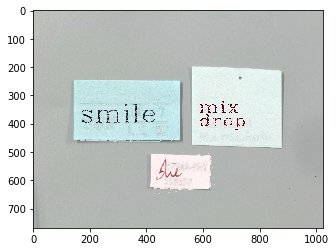

In [39]:
fps = np.random.permutation(glob('/home/rob/HWR/Aarhus/*.CR2'))
for fp in fps:
    with rawpy.imread(fp) as raw:
        img = raw.postprocess()
    plt.imshow(img)
    break
plt.imshow(img)

In [2]:
df = pd.read_csv('../06. Make Fake Labels/box coords aarhus.csv', index_col=0).dropna()


In [3]:
df['faked_fp'] = df['orig_fp'].map(lambda x: x.replace('lablabel','FullFaked')[:-5] + '.jpg')

for fp in tqdm(df['faked_fp'].drop_duplicates()):
    if os.path.exists(fp):
        img = cv2.imread(fp)
        df.loc[df['faked_fp'] == fp,'width'] = img.shape[1]
        df.loc[df['faked_fp'] == fp,'height'] = img.shape[0]
        

In [5]:
def set_type_no(_type):
    if _type == 'QR':
        return 0
    elif _type == 'HWR':
        return 1
    elif _type == 'OCR':
        return 2
    else:
        return 3


df['type_no'] = df['type'].map(set_type_no)
df['label_width'] = (df['ex'] - df['sx'])/df['width']
df['label_height'] = (df['ey'] - df['sy'])/df['height']
df['x'] = (df['ex'] + df['sx'])/2/df['width']
df['y'] = (df['ey'] + df['sy'])/2/df['height']

for name,group in tqdm(df.groupby('faked_fp'),total=len(df['faked_fp'].drop_duplicates())):
    txt_fp = name.replace('jpg','txt')
    if name in act['orig_fp'].values:
        for name2,row in group.iterrows():
            _type = act[act['label_fp'] == row['orig_fp']]['type_no'].iloc[0]
            group.loc[name2,'type_no'] = _type
        group[['type_no','x','y','label_width','label_height']].to_csv(name.replace('FullFaked','lab').replace('jpg','txt'),sep = ' ',index=False,header=False)
    group[['type_no','x','y','label_width','label_height']].to_csv(txt_fp,sep = ' ',index=False,header=False)
    


/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
name

'/home/rob/HWR/datasets/Aarhus/NHMA-ENT-199477-FullFaked.jpg'

In [28]:
def set_type_no(_type):
    if _type == 'QR':
        return 0
    elif _type == 'HWR':
        return 1
    elif _type == 'OCR':
        return 2
    else:
        return 3


df['type_no'] = df['type'].map(set_type_no)
df['label_width'] = (df['ex'] - df['sx'])/df['width']
df['label_height'] = (df['ey'] - df['sy'])/df['height']
df['x'] = (df['ex'] + df['sx'])/2/df['width']
df['y'] = (df['ey'] + df['sy'])/2/df['height']

for name,group in tqdm(df.groupby('faked_fp'),total=len(df['faked_fp'].drop_duplicates())):
    txt_fp = name.replace('jpg','txt')
    group[['type_no','x','y','label_width','label_height']].to_csv(txt_fp,sep = ' ',index=False,header=False)


In [4]:
act = pd.read_csv('classifications.csv',index_col=0)
act['type_no'] = act['type_no'].map(int)
act

,orig_fp,label_fp,_type,type_no
0,/home/rob/HWR/datasets/zooniverse/219414/Fake_...,/home/rob/HWR/datasets/zooniverse/219414/Label...,q,0
1,/home/rob/HWR/datasets/zooniverse/219414/Fake_...,/home/rob/HWR/datasets/zooniverse/219414/Label...,h,1
2,/home/rob/HWR/datasets/zooniverse/221652/Fake_...,/home/rob/HWR/datasets/zooniverse/221652/Label...,o,2
3,/home/rob/HWR/datasets/zooniverse/221652/Fake_...,/home/rob/HWR/datasets/zooniverse/221652/Label...,q,0
4,/home/rob/HWR/datasets/zooniverse/221652/Fake_...,/home/rob/HWR/datasets/zooniverse/221652/Label...,h,1
5,/home/rob/HWR/datasets/zooniverse/219858/Fake_...,/home/rob/HWR/datasets/zooniverse/219858/Label...,q,0
6,/home/rob/HWR/datasets/zooniverse/219858/Fake_...,/home/rob/HWR/datasets/zooniverse/219858/Label...,h,1
11,/home/rob/HWR/datasets/zooniverse/222919/Fake_...,/home/rob/HWR/datasets/zooniverse/222919/Label...,q,0
12,/home/rob/HWR/datasets/zooniverse/222919/Fake_...,/home/rob/HWR/datasets/zooniverse/222919/Label...,h,1
13,/home/rob/HWR/datasets/zooniverse/219777/Fake_...,/home/rob/HWR/datasets/zooniverse/219777/Label...,q,0


In [5]:
#Train, valid, test, split
fps = glob('/home/rob/HWR/datasets/Aarhus/*FullFaked*.jpg')
fps += glob('/home/rob/HWR/datasets/zooniverse/*/Fake_LowRes*.jpg')
np.random.seed(42)
fps = np.random.permutation(fps)
#60,20,20
train = fps[:int(len(fps)*0.7)]
val = fps[int(len(fps)*0.7):]
#test = fps[int(len(fps)*0.8):]
#np.savetxt('train.txt',train,fmt='%s',delimiter='\n')
#np.savetxt('val.txt',val,fmt='%s',delimiter='\n')
test = fps
np.savetxt('test_aarhus.txt',test,fmt='%s',delimiter='\n')

In [2]:

fps[:10]

['/home/rob/HWR/datasets/zooniverse/221812/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/221223/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/222460/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/220139/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/220398/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/222592/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/220499/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/221556/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/222402/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/220996/Cropped002.jpg']

In [39]:
fp = '/home/rob/HWR/datasets/IAM/ascii/words.txt'
i = 0
lines = []
for line in open(fp,'r'):
    line = line.split(' ')
    line = ' '.join(line[:9]) + ''.join(line[9:])
    lines+=[line.split('\n')[0].split(' ')]


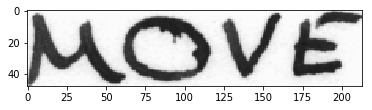

In [52]:
fp = '/home/rob/HWR/datasets/IAM/forms/a01-000u.png'
img = cv2.imread(fp)
x = 507
y = 766
w = 213
h = 48
plt.imshow(img[y:y+h,x:x+w])


In [56]:
cols = ['word_id','ok?','th','x','y','w','h','pos','word']
df = pd.DataFrame(lines[18:],columns = cols)
df['x'] = df['x'].map(int)
df['y'] = df['y'].map(int)
df['w'] = df['w'].map(int)
df['h'] = df['h'].map(int)

df['form_img'] = df['word_id'].map(lambda x: '-'.join(x.split('-')[:2]) + '.png')
df['x'] = df['x']+df['w']//2
df['x'] = df['x']/
df['y'] = df['y'] + df['h']//2
df['y'] = df['y'] + df['h']//2
df['class'] = 0

In [ ]:
df[]

In [64]:

for name,group in tqdm(df.groupby('form_img'),total=len(df['form_img'].drop_duplicates())):
    img = cv2.imread('/home/rob/HWR/datasets/IAM/forms/'+name)
    height,width = img.shape[:2]
    group['x'] = group['x']/width
    group['y'] = group['y']/height
    group['w'] = group['w']/width
    group['h'] = group['h']/height
    group = group[['class','x','y','w','h']]
    group.to_csv('/home/rob/HWR/datasets/IAM/forms/'+name.replace('png','txt'),sep=' ',index=False)
    if (group['x'].max() > 1) | (group['y'].max() > 1) |(group['w'].max() > 1) |(group['h'].max() > 1):
        print('wtf')
        break

  0%|          | 0/1539 [00:00<?, ?it/s]/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [61]:
pd.read_csv('/home/rob/HWR/datasets/IAM/forms/'+name.replace('png','txt'),sep=' ')


,class,x,y,w,h
0,0,0.169827,0.223885,0.010891,0.014399
1,0,0.247277,0.223038,0.085922,0.013552
2,0,0.335216,0.222756,0.028237,0.014116
3,0,0.404195,0.224732,0.066962,0.022021
4,0,0.503429,0.221344,0.050827,0.017222
5,0,0.657120,0.220779,0.154094,0.020610
6,0,0.799516,0.223885,0.069786,0.020327
7,0,0.248084,0.277244,0.177894,0.028233
8,0,0.392900,0.281479,0.059298,0.022304
9,0,0.490520,0.276398,0.083905,0.011858


In [74]:
#split into train and test
fps = glob('/home/rob/HWR/datasets/IAM/forms/*.png')
np.random.seed(42)
fps = np.random.permutation(fps)
percent_test = 20
num_train = len(fps)*(100-percent_test)
train = fps[:num_train]
test = fps[num_train:]
file_train = open('/home/rob/HWR/darknet/train.txt','w')
file_test = open('/home/rob/HWR/darknet/test.txt','w')
for line in train:
    file_train.write(line+'\n')
for line in test:
    file_test.write(line+'\n')

In [76]:
with open('/home/rob/HWR/darknet/train.txt','r') as f:
    for line in f:
        print('dfasdf',line)
        if '5' in line:
            break

dfasdf /home/rob/HWR/datasets/IAM/forms/d04-071.png

dfasdf /home/rob/HWR/datasets/IAM/forms/l07-190.png

dfasdf /home/rob/HWR/datasets/IAM/forms/g07-030.png

dfasdf /home/rob/HWR/datasets/IAM/forms/d04-012.png

dfasdf /home/rob/HWR/datasets/IAM/forms/g07-010b.png

dfasdf /home/rob/HWR/datasets/IAM/forms/f07-000b.png

dfasdf /home/rob/HWR/datasets/IAM/forms/a03-020.png

dfasdf /home/rob/HWR/datasets/IAM/forms/e07-072.png

dfasdf /home/rob/HWR/datasets/IAM/forms/a01-113u.png

dfasdf /home/rob/HWR/datasets/IAM/forms/r02-146.png

dfasdf /home/rob/HWR/datasets/IAM/forms/e07-086.png

dfasdf /home/rob/HWR/datasets/IAM/forms/c02-012.png

dfasdf /home/rob/HWR/datasets/IAM/forms/l01-023.png

dfasdf /home/rob/HWR/datasets/IAM/forms/e06-021.png

dfasdf /home/rob/HWR/datasets/IAM/forms/a02-037.png

dfasdf /home/rob/HWR/datasets/IAM/forms/m04-231.png

dfasdf /home/rob/HWR/datasets/IAM/forms/n04-149.png

dfasdf /home/rob/HWR/datasets/IAM/forms/f03-169.png

dfasdf /home/rob/HWR/datasets/IAM/forms/m04